In [1]:
%matplotlib inline
import scipy.sparse as sp
import matplotlib.pyplot as plt
import pickle

# import sys
# sys.path.append("/data/user/albajacas_a/solvers_decay_equation")
# from triangularise_matrix import triangularise_matrix


matrix_dir = 'data/A_matrices/'

fs = 15

In [2]:
with open(matrix_dir + 'nuclide_dictionary.pkl', 'rb') as f:
    nuclide_dict = pickle.load(f)


nuclides = list(nuclide_dict.keys())
nuclides

['H1',
 'H2',
 'H3',
 'H4',
 'H5',
 'H6',
 'H7',
 'He3',
 'He4',
 'He5',
 'He6',
 'He7',
 'He8',
 'He9',
 'He10',
 'Li4',
 'Li5',
 'Li6',
 'Li7',
 'Li8',
 'Li9',
 'Li10',
 'Li11',
 'Li12',
 'Be5',
 'Be6',
 'Be8',
 'Be9',
 'Be10',
 'Be11',
 'Be12',
 'Be13',
 'Be14',
 'Be15',
 'Be16',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'N10',
 'N11',
 'N12',
 'N13',
 'N14',
 'N15',
 'N16',
 'N17',
 'N18',
 'N19',
 'N20',
 'N21',
 'N22',
 'N23',
 'N24',
 'N25',
 'O12',
 'O13',
 'O14',
 'O15',
 'O16',
 'O17',
 'O18',
 'O19',
 'O20',
 'O21',
 'O22',
 'O23',
 'O24',
 'O25',
 'O26',
 'O27',
 'O28',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30',
 'F31',
 'Ne16',
 'Ne17',
 'Ne18',
 'Ne19',
 'Ne20',
 'Ne21',
 'Ne22',
 'Ne23',
 'Ne24',
 

# Burnup

In [3]:
%matplotlib inline
import scipy.sparse as sp
import matplotlib.pyplot as plt
import numpy as np
import pickle
A_bu = sp.load_npz("data/A_matrices/burnup_matrix_endfb71.npz").toarray()
A_bu

array([[-3.73043620e-12,  1.46431050e-13,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.73043620e-12, -1.52352630e-13,  3.53586493e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.92158010e-15, -1.78283718e-09, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.08065414e+03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -3.64814306e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.69060288e+02]])

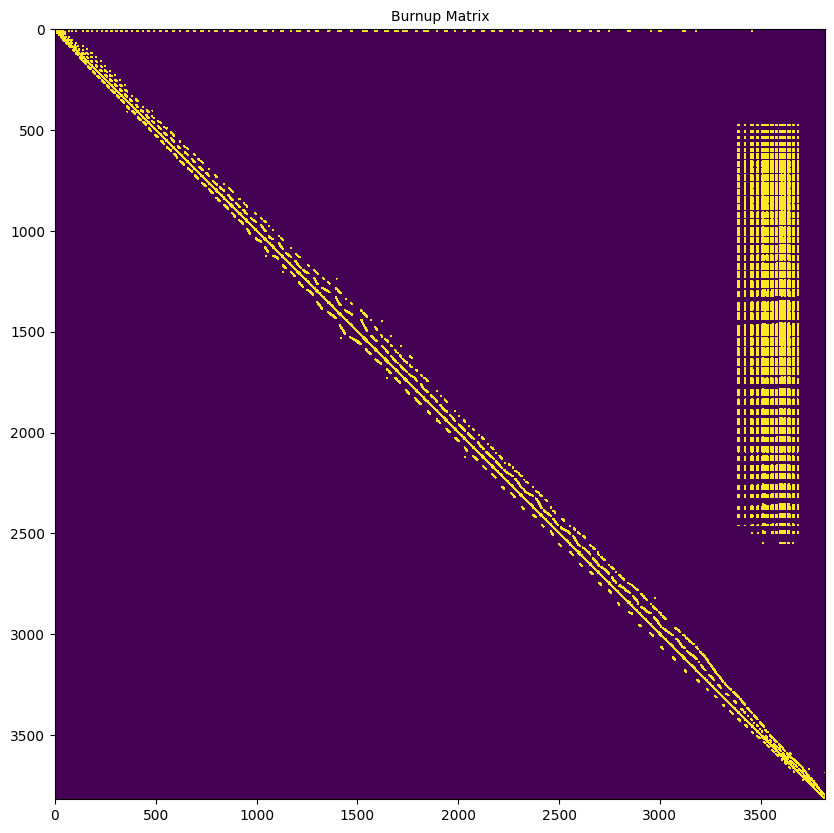

In [4]:
fig,ax = plt.subplots(figsize = (10,10))
fs = 10
ax.imshow(np.abs(A_bu),vmax = 1e-100)
ax.set_title("Burnup Matrix", fontsize = fs)
plt.show()

In [14]:
# We can try to triangularise the matrix, but in theory it shouldn't work because it's a burnup matrix.
B = np.copy(A_bu)
triangularise_matrix(B)

Matrix could not be triangularised after 20 runs.


## Eigenvalues

In [6]:
# Make sparse and remove the hydrogen and helium isotopes
A_sparse = sp.csr_matrix(A_bu[50:,50:])
diags = np.diag(A_bu)

In [7]:
diags.max()

0.0

In [8]:
k = 3000
eigvals,_ = sp.linalg.eigs(A_sparse, k = k)

In [9]:
im_count = 0
re_count = 0
positive_count = 0
for eig in eigvals:
#     print(eig)
    if eig.imag == 0:
        re_count += 1
    else:
        im_count += 1
    if eig.real > 0:
        positive_count += 1
        
print(re_count, "real eigvals and", im_count, "imaginary eigvals.")
print(positive_count,  "eivals have a positive real part!")

444 real eigvals and 2556 imaginary eigvals.
668 eivals have a positive real part!


## Test getting smaller burnup matrix

Try to get the blocks that Pusa had in her theses, figure 3.4 (https://www.semanticscholar.org/paper/Numerical-methods-for-nuclear-fuel-burnup-Pusa/c153d11192995f5c8146754809b27847c4f4d848)

The colored blocks are Strongly Connected Components (SCC), which are blocks of isotopes with closed loops, i.e. a burnup chain where isotopes can become more and less abundant with time. (in non SCC isotopes can only decay and become less abundant with time).

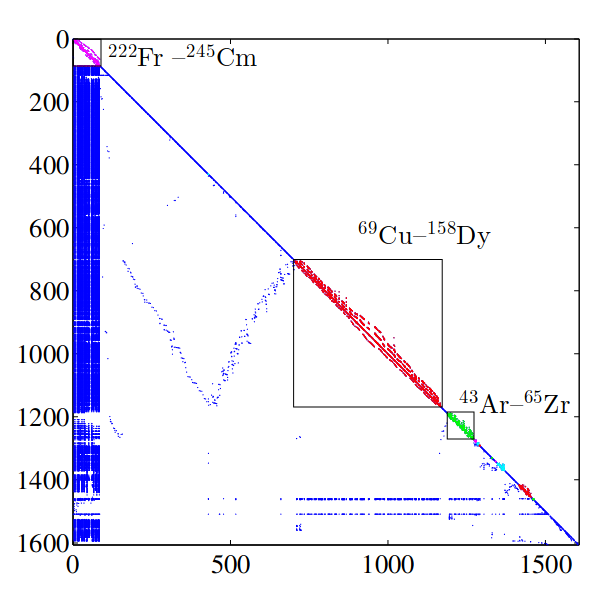

In [4]:
from IPython.display import Image
Image("matrix_Pusa.png")

### Block Fr222-Cm245

In [5]:
nucs = list(nuclide_dict.keys())

In [14]:
idx1, idx2 = nucs.index('Fr222'), nucs.index('Cm245')
# Small matrix:
sm_A = A_bu[idx1:idx2,idx1:idx2]

In [15]:
np.savez(matrix_dir + "burnup250.npz", sm_A)

In [8]:
print("The matrix has size", sm_A.shape, '\n')
print("And it has several imaginary eigenvalues:")
eigs = np.linalg.eig(sm_A)[0]
for i,eig in enumerate(eigs):
    if eig.imag != 0.0:
        print("eigval", i, "is imaginary")
        print(eig)

print("\nAnd it cannot be triangularised:")
# Can it be triangularised?
# triangularise_matrix(sm_A.copy())

The matrix has size (250, 250) 

And it has several imaginary eigenvalues:
eigval 74 is imaginary
(-2.254603002773408e-08+3.297145309800208e-09j)
eigval 75 is imaginary
(-2.254603002773408e-08-3.297145309800208e-09j)
eigval 77 is imaginary
(-1.417852993182607e-08+3.5044205479836087e-09j)
eigval 78 is imaginary
(-1.417852993182607e-08-3.5044205479836087e-09j)
eigval 83 is imaginary
(-4.5157697744100295e-09+1.1607479724702194e-09j)
eigval 84 is imaginary
(-4.5157697744100295e-09-1.1607479724702194e-09j)
eigval 90 is imaginary
(-3.898972432554932e-09+1.0043269527078124e-09j)
eigval 91 is imaginary
(-3.898972432554932e-09-1.0043269527078124e-09j)

And it cannot be triangularised:


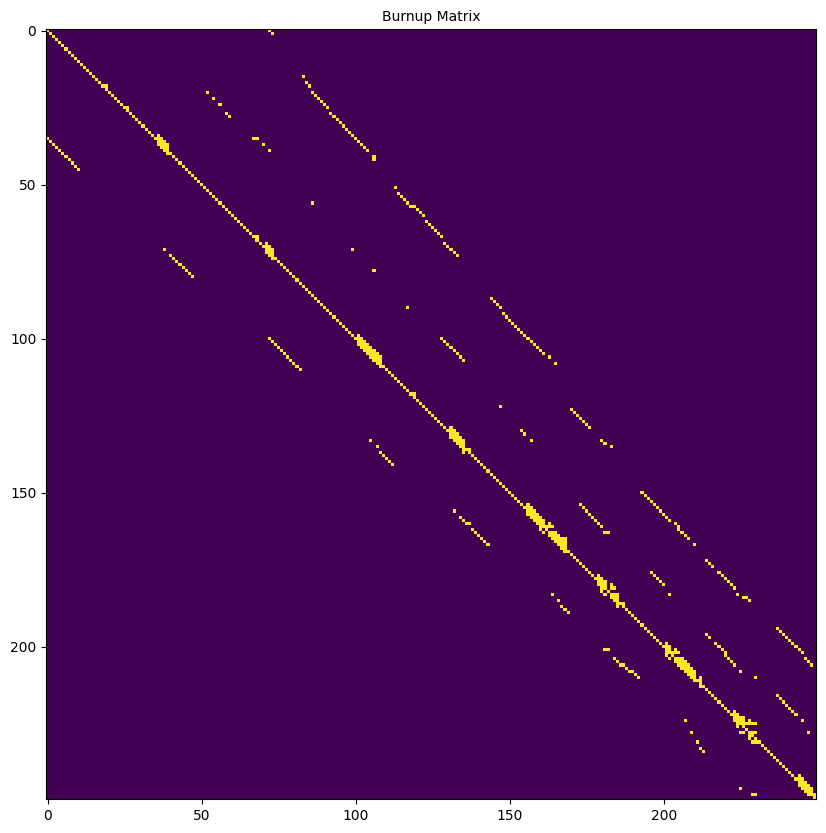

In [9]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(sm_A),vmax = 1e-100)
ax.set_title("Burnup Matrix", fontsize = fs)
plt.show()

#### Split it into smaller matrices

In [16]:
super_small_A = sm_A[-50:, -50:]
np.savez(matrix_dir + "burnup50.npz", super_small_A)

In [11]:
print("The matrix has size", super_small_A.shape, '\n')
print("And it has several imaginary eigenvalues:")
eigs = np.linalg.eig(super_small_A)[0]
for i,eig in enumerate(eigs):
    if eig.imag != 0.0:
        print("eigval", i, "is imaginary")
        print(eig)

print("\nAnd it cannot be triangularised:")
# Can it be triangularised?
# triangularise_matrix(super_small_A.copy())

The matrix has size (50, 50) 

And it has several imaginary eigenvalues:
eigval 18 is imaginary
(-2.2546454711650574e-08+3.2973148691326884e-09j)
eigval 19 is imaginary
(-2.2546454711650574e-08-3.2973148691326884e-09j)
eigval 20 is imaginary
(-1.417868704969817e-08+3.5063095396171706e-09j)
eigval 21 is imaginary
(-1.417868704969817e-08-3.5063095396171706e-09j)
eigval 22 is imaginary
(-4.508206014791287e-09+1.1584391228780974e-09j)
eigval 23 is imaginary
(-4.508206014791287e-09-1.1584391228780974e-09j)

And it cannot be triangularised:


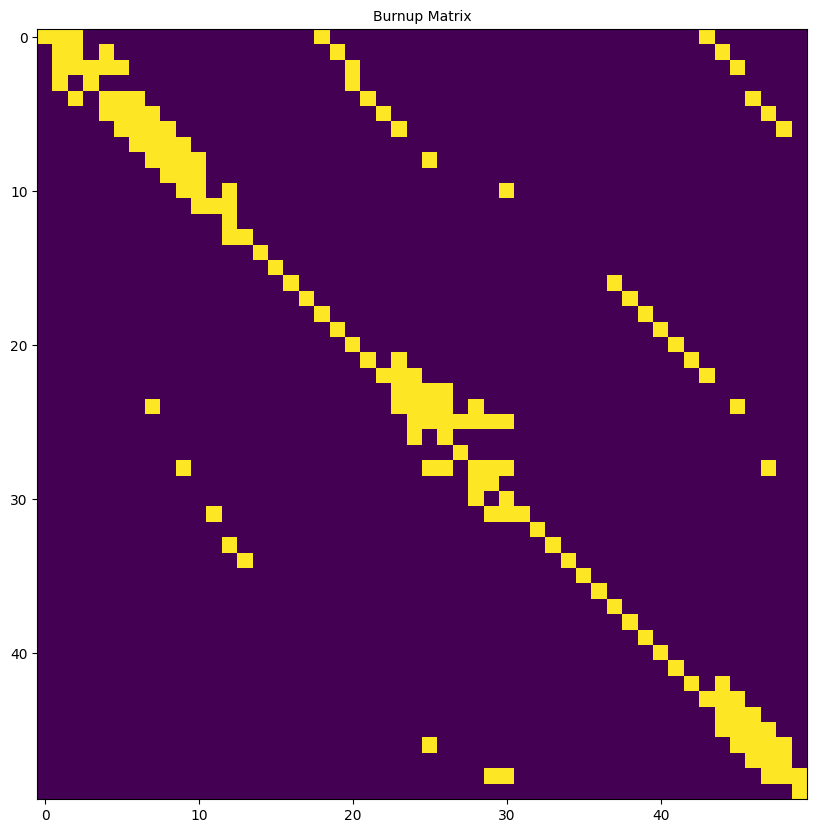

In [12]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(super_small_A),vmax = 1e-100)
ax.set_title("Burnup Matrix", fontsize = fs)
plt.show()

### Block Ar43-Zr65

In [17]:
idx1, idx2 = nucs.index('Ar43'), nucs.index('Zr78')  # Zr65 isn't present in our library
# Small matrix:
sm_A = A_bu[idx1:idx2,idx1:idx2]
np.savez(matrix_dir + "burnup713.npz", sm_A)

In [26]:
print("The matrix has size", sm_A.shape, '\n')
print("And it has several imaginary eigenvalues:")
eigs = np.linalg.eig(sm_A)[0]
for i,eig in enumerate(eigs):
    if eig.imag != 0.0:
        print("eigval", i, "is imaginary")
        print(eig)

print("\nAnd it cannot be triangularised:")
# Can it be triangularised?
# triangularise_matrix(sm_A.copy())

The matrix has size (713, 713) 

And it has several imaginary eigenvalues:
eigval 156 is imaginary
(-3.079397047441326e-11+1.498351520404716e-12j)
eigval 157 is imaginary
(-3.079397047441326e-11-1.498351520404716e-12j)
eigval 158 is imaginary
(-2.8548259892680015e-11+3.2823853528756856e-12j)
eigval 159 is imaginary
(-2.8548259892680015e-11-3.2823853528756856e-12j)
eigval 160 is imaginary
(-2.5499943557135044e-11+4.158711708780067e-12j)
eigval 161 is imaginary
(-2.5499943557135044e-11-4.158711708780067e-12j)
eigval 162 is imaginary
(-2.1766972952510495e-11+4.705226331206976e-12j)
eigval 163 is imaginary
(-2.1766972952510495e-11-4.705226331206976e-12j)
eigval 165 is imaginary
(-1.8043765687200126e-11+4.76733619907784e-12j)
eigval 166 is imaginary
(-1.8043765687200126e-11-4.76733619907784e-12j)
eigval 167 is imaginary
(-1.4408736348047601e-11+4.2161178051523165e-12j)
eigval 168 is imaginary
(-1.4408736348047601e-11-4.2161178051523165e-12j)
eigval 169 is imaginary
(-1.0983355004665328e-11+

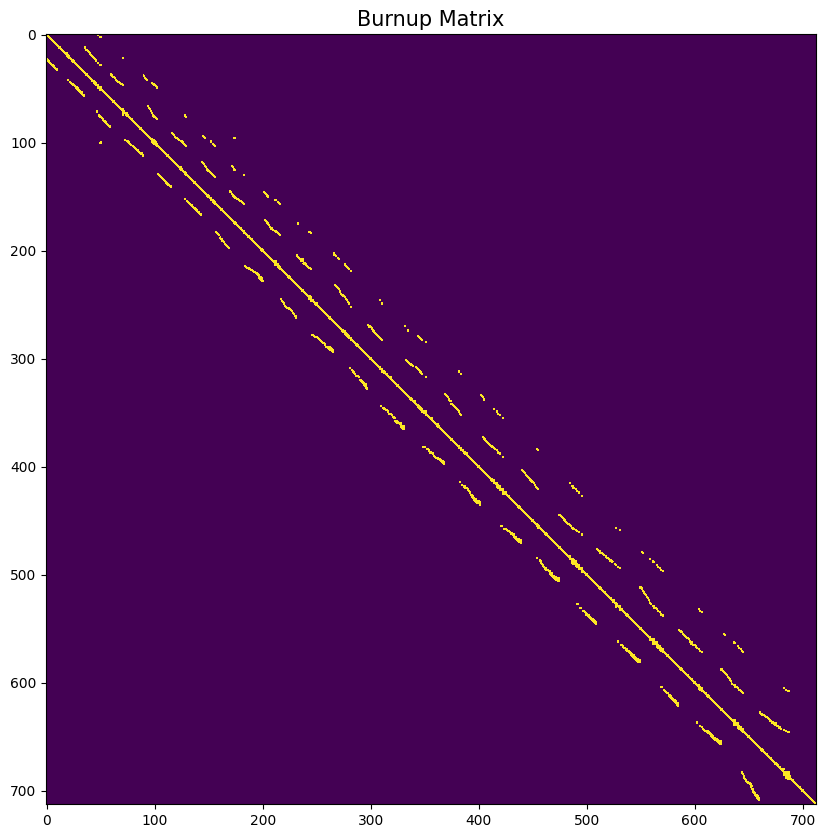

In [28]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(sm_A),vmax = 1e-100)
ax.set_title("Burnup Matrix", fontsize = fs)
plt.show()

#### Split this one into smaller matrices

# Depletion only

In [15]:
A_dep = sp.load_npz(matrix_dir + "decay_matrix_endfb71.npz").toarray()
A_dep

array([[-5.69906211e-214,  2.23705648e-215,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 5.69906211e-214, -2.32752165e-215,  5.40181169e-217, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  9.04651654e-217, -1.78283365e-009, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
        -3.08065414e+003,  0.00000000e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000, -3.64814306e+000,  0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000, -1.69060288e+002]])

In [16]:
# Remove values smaller than 1e-200, since they are like zeros
A_dep[np.abs(A_dep) < 1e-200] = 0.0
print("Is triangular?", np.allclose(A_dep, np.tril(A_dep), atol=1e-20) == True)
# It is not triangular, but since it's only depletion it should be triangularisable.

Is triangular? False


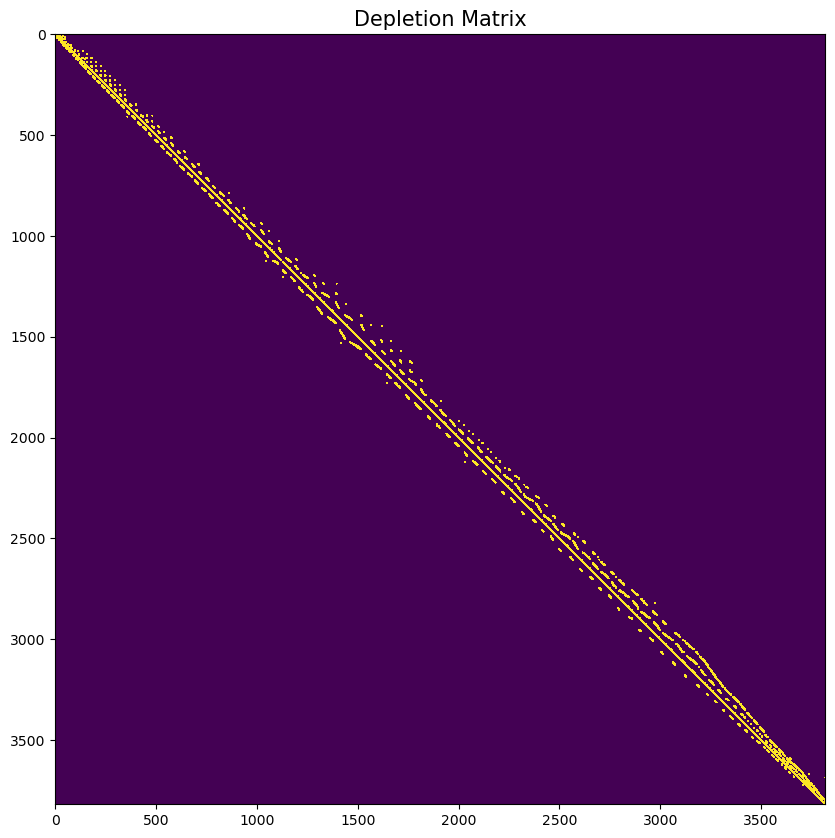

In [17]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(A_dep),vmax = 1e-100)
ax.set_title("Depletion Matrix", fontsize = fs)
plt.show()

In [18]:
B = np.copy(A_dep)
idxs = triangularise_matrix(B)
nuclides_tri = [nuclides[idx] for idx in idxs]

print("Is triangular?", np.allclose(B, np.tril(B), atol=1e-20) == True)

Is triangular? True


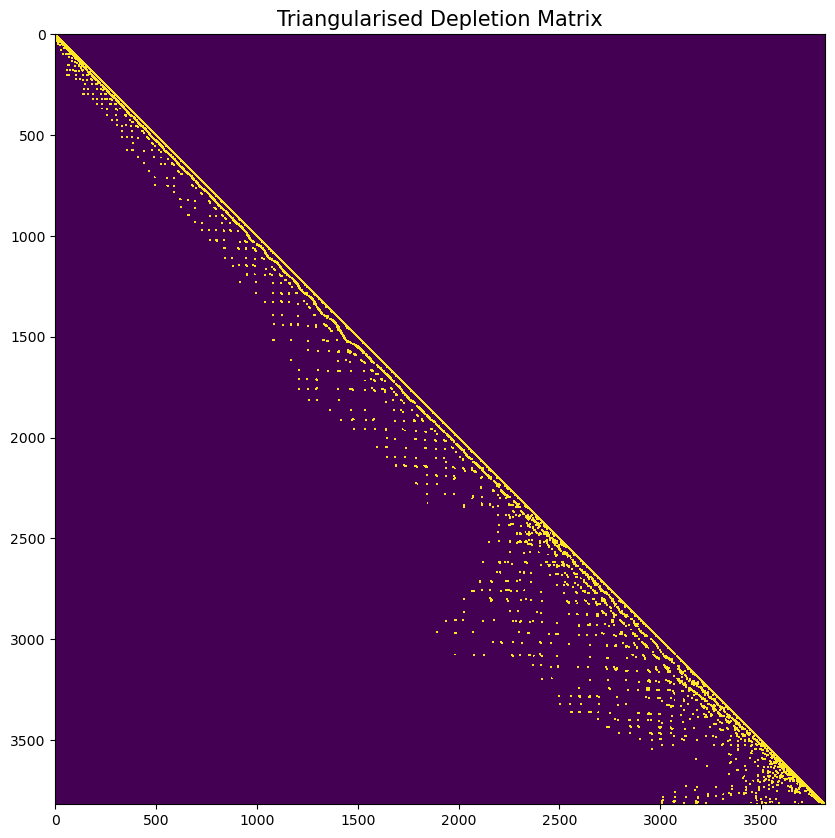

In [19]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(B),vmax = 1e-100)
ax.set_title("Triangularised Depletion Matrix", fontsize = fs)
plt.show()

In [20]:
nuclides_tri

['N10',
 'H2',
 'H6',
 'H7',
 'H5',
 'H4',
 'H3',
 'Be5',
 'He10',
 'He5',
 'He7',
 'He6',
 'He9',
 'He8',
 'Li8',
 'B6',
 'C9',
 'Li6',
 'Li12',
 'B7',
 'Li10',
 'Li9',
 'Li11',
 'Be11',
 'Li4',
 'B9',
 'C8',
 'Be9',
 'Be10',
 'Li7',
 'Be13',
 'Be12',
 'Be15',
 'Be16',
 'Be14',
 'He3',
 'B8',
 'Be8',
 'Be6',
 'O12',
 'C11',
 'B12',
 'B13',
 'B14',
 'B16',
 'B15',
 'B18',
 'B17',
 'B19',
 'He4',
 'Li5',
 'N11',
 'B11',
 'N12',
 'N13',
 'C18',
 'C15',
 'C16',
 'C17',
 'C19',
 'N18',
 'C21',
 'C20',
 'C22',
 'H1',
 'C10',
 'N16',
 'C13',
 'C14',
 'F16',
 'F14',
 'N17',
 'F15',
 'N19',
 'N20',
 'N21',
 'N22',
 'N25',
 'N24',
 'N23',
 'B10',
 'O13',
 'Ne16',
 'O15',
 'Na18',
 'Si22',
 'Na19',
 'O19',
 'O20',
 'O21',
 'O22',
 'O23',
 'O28',
 'O27',
 'O26',
 'O25',
 'O24',
 'C12',
 'O14',
 'N15',
 'Mg21',
 'Al22',
 'Al21',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F30',
 'F29',
 'F31',
 'N14',
 'Mg19',
 'Ne18',
 'Mg20',
 'Na20',
 'P24',
 'Si23',
 'Ne23',
 'Ne2

Number of zero eigvals: 277
λmin =  -3.0136833937388922e+22
λmax =  -1.293185038358107e-28


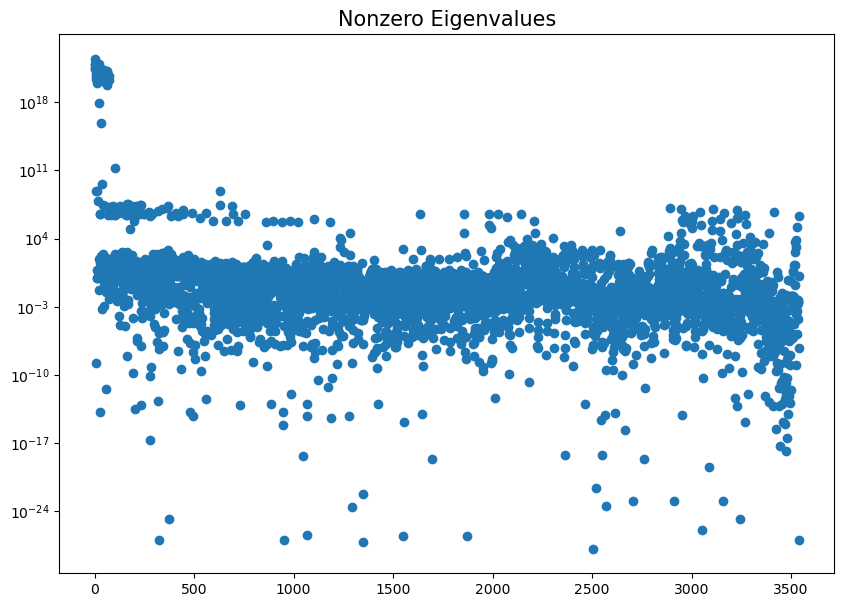

In [21]:
lams = np.diag(B)
print("Number of zero eigvals:", len(np.where(lams == 0.0)[0]))
lams = lams[np.where(lams != 0.0)]
print("λmin = ", np.min(lams))
print("λmax = ", np.max(lams))
fig,ax = plt.subplots(figsize = (10,7))
ax.plot(np.abs(lams), "o")
ax.set_yscale("log")
ax.set_title("Nonzero Eigenvalues", fontsize = fs)
plt.show()

## Compare to endb71 matrix provided by Jiri 

In [23]:
A_Jiri = sp.load_npz(matrix_dir + "../jiri_matrices_for_python/endfb71.npz").toarray()
A_Jiri

array([[    0.    ,     0.    ,     0.    , ...,     0.    ,     3.6481,
            0.    ],
       [    0.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       [    0.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
            0.    ],
       ...,
       [    0.    ,     0.    ,     0.    , ..., -3080.7   ,     0.    ,
            0.    ],
       [    0.    ,     0.    ,     0.    , ...,     0.    ,    -3.6481,
            0.    ],
       [    0.    ,     0.    ,     0.    , ...,     0.    ,     0.    ,
         -169.06  ]])

In [24]:
A_Jiri.shape

(3822, 3822)

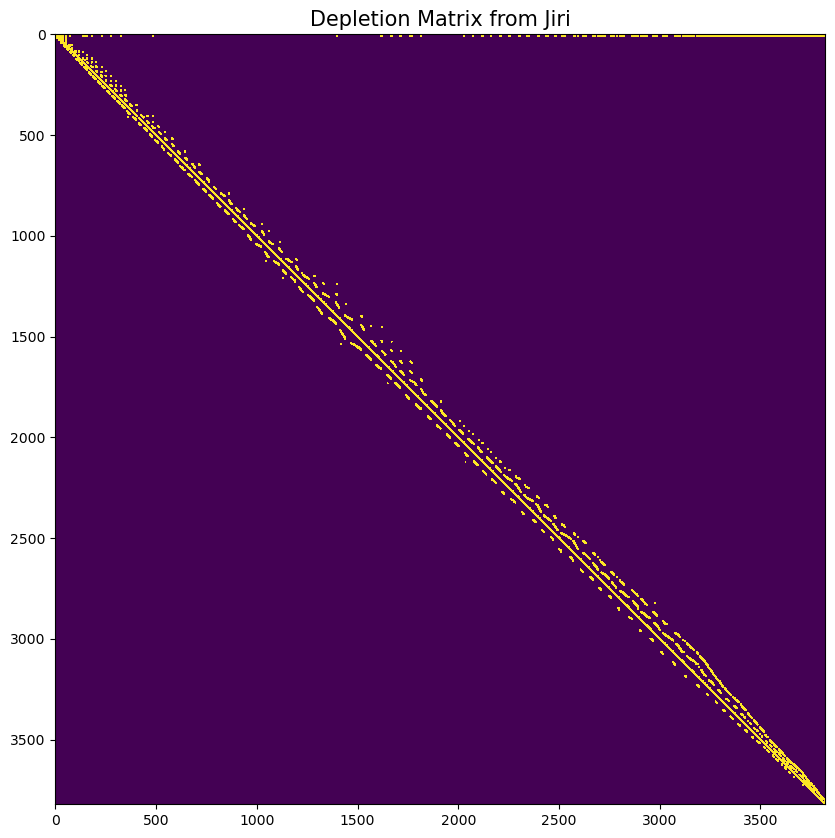

In [25]:
fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(A_Jiri), vmax = 1e-100)
ax.set_title("Depletion Matrix from Jiri", fontsize = fs)
plt.show()

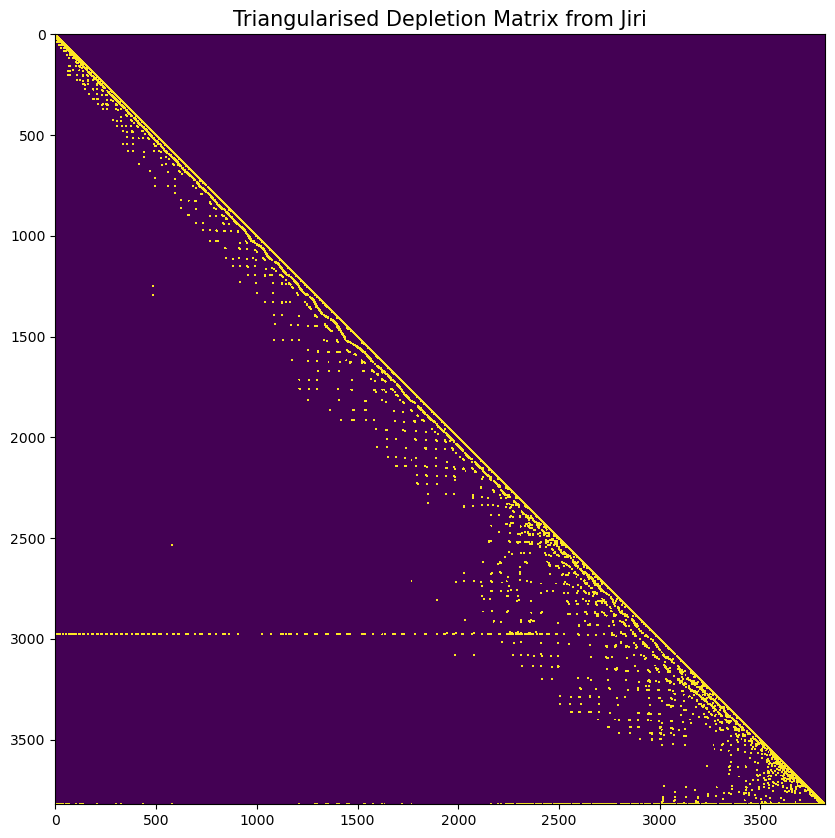

In [26]:
B = np.copy(A_Jiri)
triangularise_matrix(B)

fig,ax = plt.subplots(figsize = (10,10))

ax.imshow(np.abs(B),vmax = 1e-100)
ax.set_title("Triangularised Depletion Matrix from Jiri", fontsize = fs)
plt.show()